## Observations and Insights 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, escapechar='\\')
study_results = pd.read_csv(study_results_path, escapechar='\\')

# Combine the data into a single dataset
combined_metadata_studyresults = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_metadata_studyresults

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [113]:
# Checking the number of mice.
total_mice_df = combined_metadata_studyresults["Mouse ID"].count()
data = [total_mice_df] 
total_mice_df= pd.DataFrame(data, columns = ["Total Mice"])
total_mice_df

,Total Mice
0,1893


In [114]:
# Optional: Get all the data for the duplicate mouse ID. 
find_duplicates_df = combined_metadata_studyresults[combined_metadata_studyresults.duplicated(["Mouse ID", "Timepoint"])]
find_duplicates_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [115]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_metadata_studyresults.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_data_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [116]:
# Checking the number of mice in the clean DataFrame.
revised_total_mice_df = cleaned_data_df["Mouse ID"].count()
data = [revised_total_mice_df] 
revised_total_mice_df= pd.DataFrame(data, columns = ["Total Mice"])
revised_total_mice_df

,Total Mice
0,1888


## Summary Statistics

In [117]:
cleaned_data_df.rename(columns = {'Tumor Volume (mm3)':'Tumor_Volume'}, inplace=True)
cleaned_data_df

C:\Users\kwelter\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [118]:
cleaned_data_df.columns = [c.replace(' ', '_') for c in cleaned_data_df.columns]


In [119]:
# Mean Tumor Volume
mean_grouped_drug_regimen_df = cleaned_data_df.groupby('Drug_Regimen', as_index=False).Tumor_Volume.mean()
mean_grouped_drug_regimen_df.set_index('Drug_Regimen', drop=True) 
mean_grouped_drug_regimen_df.rename(columns={'Tumor_Volume':'Mean'}, inplace=True)
mean_grouped_drug_regimen_df

,Drug_Regimen,Mean
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.393463
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [120]:
# Median Tumor Volume
median_grouped_drug_regimen_df = cleaned_data_df.groupby('Drug_Regimen', as_index=False).Tumor_Volume.median()
median_grouped_drug_regimen_df.set_index('Drug_Regimen', drop=True) 
median_grouped_drug_regimen_df.rename(columns={'Tumor_Volume':'Median'}, inplace=True)
median_grouped_drug_regimen_df

,Drug_Regimen,Median
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.909965
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [121]:
# Variance Tumor Volume
var_grouped_drug_regimen_df = cleaned_data_df.groupby('Drug_Regimen', as_index=False).Tumor_Volume.var()
var_grouped_drug_regimen_df.set_index('Drug_Regimen', drop=True) 
var_grouped_drug_regimen_df.rename(columns={'(Tumor_Volume)':'Variance'}, inplace=True)
var_grouped_drug_regimen_df

,Drug_Regimen,Tumor_Volume
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.138803
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [122]:
# SD Tumor Volume
sd_grouped_drug_regimen_df = cleaned_data_df.groupby('Drug_Regimen').agg({"Tumor_Volume": ["std"]})
sd_grouped_drug_regimen_df 


,Tumor_Volume
,std
Drug_Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308


In [123]:
# SEM Tumor Volume
sem_grouped_drug_regimen_df = cleaned_data_df.groupby('Drug_Regimen').agg({"Tumor_Volume": ["sem"]})
sem_grouped_drug_regimen_df 

,Tumor_Volume
,sem
Drug_Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955


In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
merge_mean_median_df =pd.merge(mean_grouped_drug_regimen_df, median_grouped_drug_regimen_df, on ='Drug_Regimen')
merge_with_var_df = pd.merge(merge_mean_median_df, var_grouped_drug_regimen_df, on ='Drug_Regimen')
merge_with_sd_df = pd.merge(merge_with_var_df, sd_grouped_drug_regimen_df , on ='Drug_Regimen')
merge_all= pd.merge(merge_with_sd_df , sem_grouped_drug_regimen_df  , on ='Drug_Regimen')
merge_all.set_index('Drug_Regimen', drop=True) 

C:\Users\kwelter\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Mean,Median,Tumor_Volume,"(Tumor_Volume, std)","(Tumor_Volume, sem)"
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
summary_grouped_drug_regimen_df = cleaned_data_df.groupby('Drug_Regimen').agg({"Tumor_Volume": ["mean", "median", "var", "std", "sem"]})
summary_grouped_drug_regimen_df 

Tumor_Volume                                          
                     mean     median        var       std       sem
Drug_Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [142]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_regimen_df = cleaned_data_df.groupby('Drug_Regimen', as_index=False).Mouse_ID.count()
indexed_total_mice_regimen_df = total_mice_regimen_df.set_index('Drug_Regimen', drop=True) 
indexed_total_mice_regimen_df

,Mouse_ID
Drug_Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


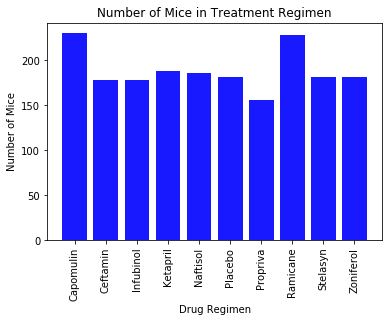

In [144]:
 # Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot
plt.bar(x = total_mice_regimen_df['Drug_Regimen'], height =total_mice_regimen_df['Mouse_ID'], color='b', alpha=0.9, align="center")
plt.xticks(rotation=90)
plt.title("Number of Mice in Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

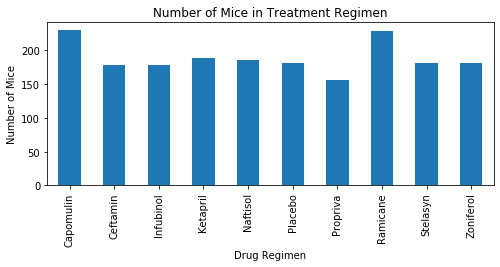

<Figure size 432x288 with 0 Axes>

In [154]:
indexed_total_mice_regimen_df.plot(kind="bar", figsize=(8,3))
plt.title("Number of Mice in Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.legend().remove()


plt.show()
plt.tight_layout()

In [ ]:
 # Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

##  Note: this plot will be identical to the one that uses Pandas

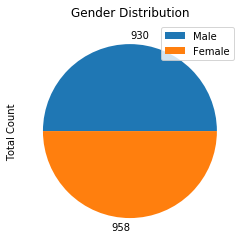

In [95]:
counted_gender_df =  cleaned_data_df['Sex'].value_counts().rename_axis('Gender').to_frame('Total Count')
counted_gender_df['Total Count'].value_counts().plot(kind='pie')
plt.title("Gender Distribution")
plt.legend(labels, loc="best")

In [96]:
 # Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot



In [155]:
 # Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas
counted_gender_df.plot(kind = "pie")


ValueError: pie requires either y column or 'subplots=True'

## Quartiles, Outliers and Boxplots

In [103]:
cleaned_data_df.sort_values("Timepoint", ascending=False)

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume,Metastatic_Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
834,f345,Infubinol,Male,23,26,45,60.918767,1
962,i635,Propriva,Male,21,26,45,58.633404,3
134,r554,Capomulin,Female,8,17,45,32.377357,3
930,h246,Ketapril,Male,13,30,45,74.104086,2
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
501,a401,Zoniferol,Female,8,25,0,45.000000,0
1345,p189,Ketapril,Male,8,28,0,45.000000,0
1661,w151,Ceftamin,Male,24,25,0,45.000000,0


In [106]:
# Activity 3.2
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = cleaned_data_df.drop_duplicates(subset='Mouse_ID', keep="last")
#last_timepoint_df["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
 # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
#activity 3.8